In [ ]:
### WARNING --- This takes about 20 minutes to execute fully -- only run this once to create the concatenated .csv on your local machine ###

import requests
import pandas as pd
import time

df = pd.DataFrame()
years = [2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

for year in years:
    print(f'Fetching data for {year}...')

    ev_all = pd.read_csv(f'EVLAcsv/EV - {year}.csv')

    evlist = list(ev_all['Exit Velocity (MPH)'])

    for ev in evlist:

        url = f"https://baseballsavant.mlb.com/statcast_hit_probability?value={ev}&type=ev&year={year}"

        response = requests.request("GET", url)

        df_new = pd.DataFrame(response.json())
        df_new['exit_velo'] = ev
        df_new['year'] = year
        
        df = pd.concat([df_new, df])
        time.sleep(1)

    #df.info()

df = df.drop(['rowId','url'], axis=1)

df.to_csv('EVLAcsv/evla_all.csv', index=False)

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('EVLAcsv/evla_all.csv')

#data.info()

# creates new column defining the result of AB based on hit type

def Result(row):
    if row['1B'] == 1:
        return '1B'
    elif row['2B'] == 1:
        return '2B'
    elif row['3B'] == 1:
        return '3B'
    elif row['HR'] == 1:
        return 'HR'
    else:
        return 'other'

#print(data)

# cleaning up column naming scheme for aesthetics/clartiy

data.rename(columns={'n_hip':'BBE', 'n_hits':'H', 'hits_per_hip':'AVG', 'woba':'wOBA', 'n_hits_1b':'1B', 'n_hits_2b':'2B', 'n_hits_3b':'3B',
            'n_hits_hr':'HR', 'hits_1b_per_hip':'%1B', 'hits_2b_per_hip':'%2B', 'hits_3b_per_hip':'%3B', 'hits_hr_per_hip':'%HR',
            'avg_distance':'Dist', 'value':'LA', 'exit_velo':'EV', 'h_type':'Result'}, inplace=True)

data = data.assign(Result=data.apply(Result, axis=1))


In [ ]:
data.info()

In [2]:
# Makes a subset df containing only single year data for each year 2015-2022

data15 = data[data['year'] == 2015]
data16 = data[data['year'] == 2016]
data17 = data[data['year'] == 2017]
data18 = data[data['year'] == 2018]
data19 = data[data['year'] == 2019]
data20 = data[data['year'] == 2020]
data21 = data[data['year'] == 2021]
data22 = data[data['year'] == 2022]

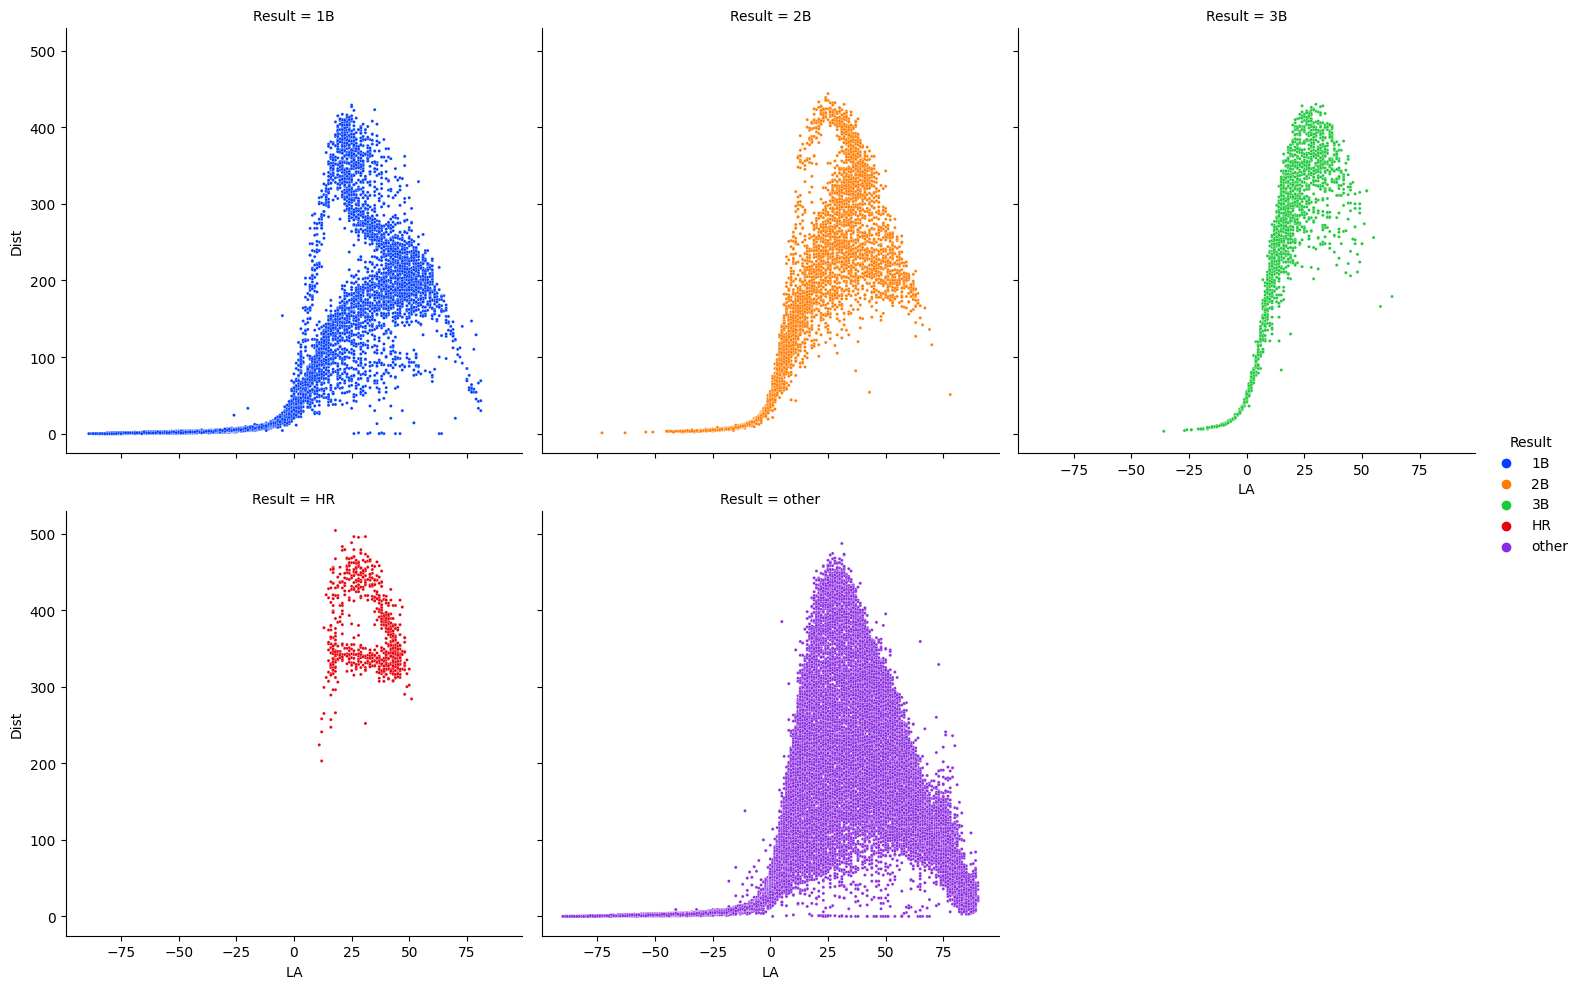

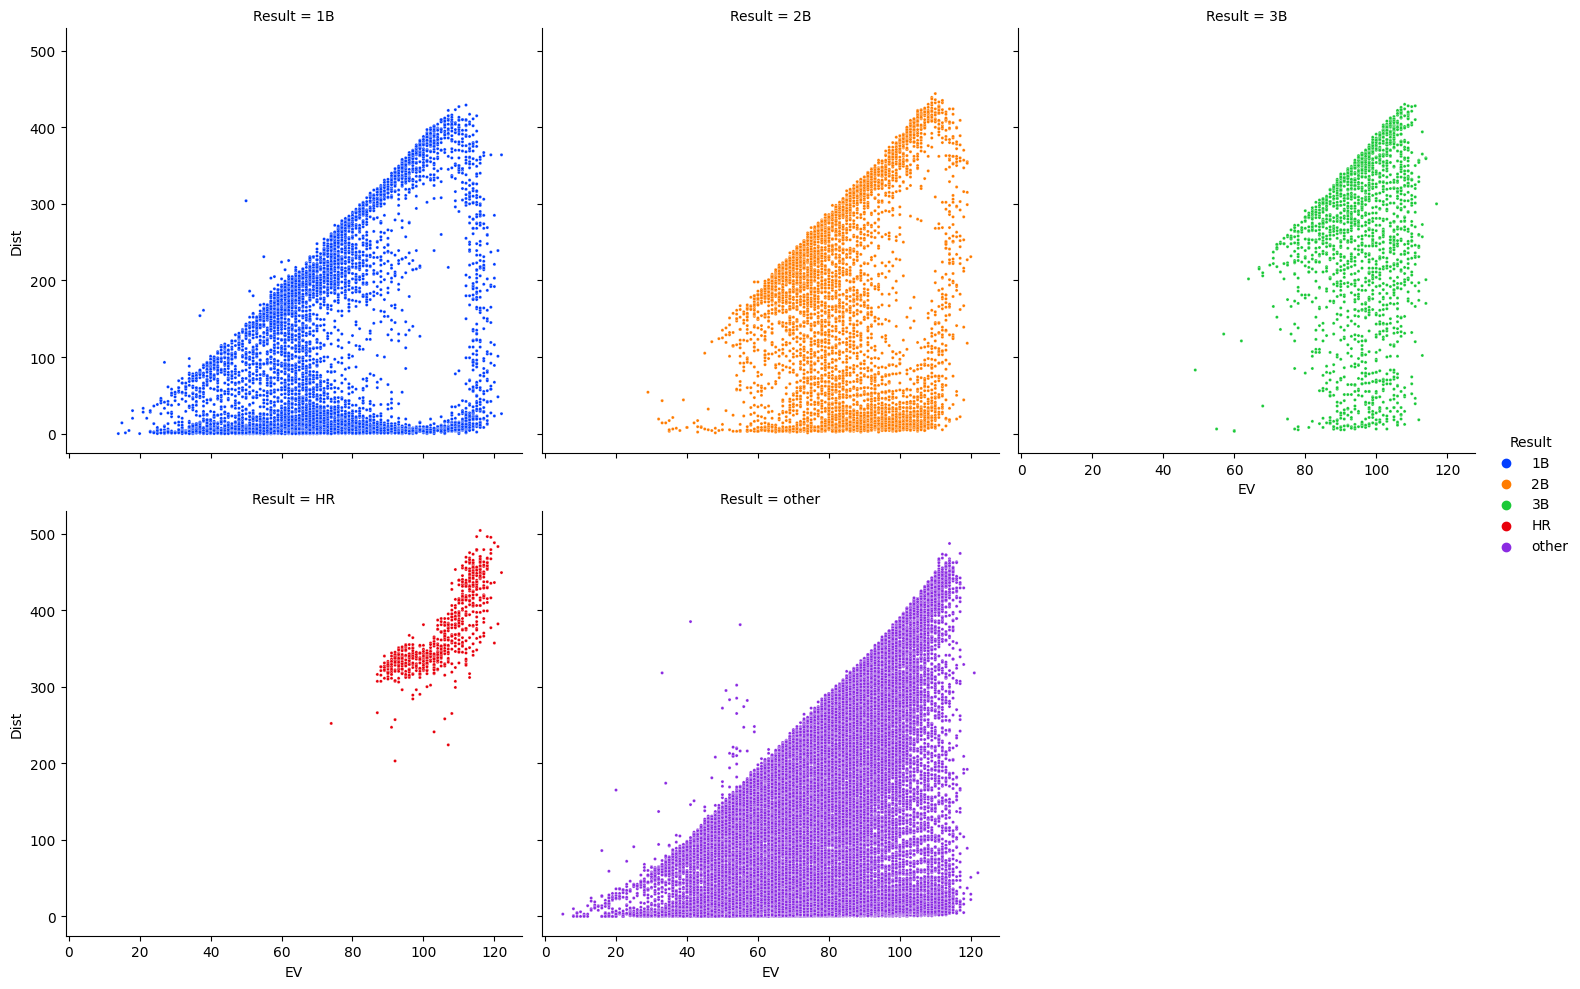

In [3]:
# Creates a plot for different hit types for a given year showing the distribution of average distance events for a given LA (top) and for a given EV (bottom)  
# ** 'other' is defined as any batted ball event (BBE) in which the player was not credited a hit. This could be the result of a multitude of reasons (part of the reason of why there are so many events)
# This includes but is not limited to: BB, ROE, HBP, Sac Bunt, Sac Fly, Catcher's Interference, etc. 

order = ['1B', '2B', '3B', 'HR', 'other']

plotLA = sns.relplot(data=data, x='LA', y='Dist', s=5, marker='o', palette='bright', hue='Result', hue_order=order, 
                   col='Result', col_wrap=3, col_order=order)
plotEV = sns.relplot(data=data, x='EV', y='Dist', s=5, marker='o', palette='bright', hue='Result', hue_order=order, 
                   col='Result', col_wrap=3, col_order=order)

In [4]:
# looking at data only for where outcome was some sort of hit (all years: 2015-2022)

data_hit = data[(data['1B'] == 1)|(data['2B'] == 1)|(data['3B'] == 1)|(data['HR'] == 1)]


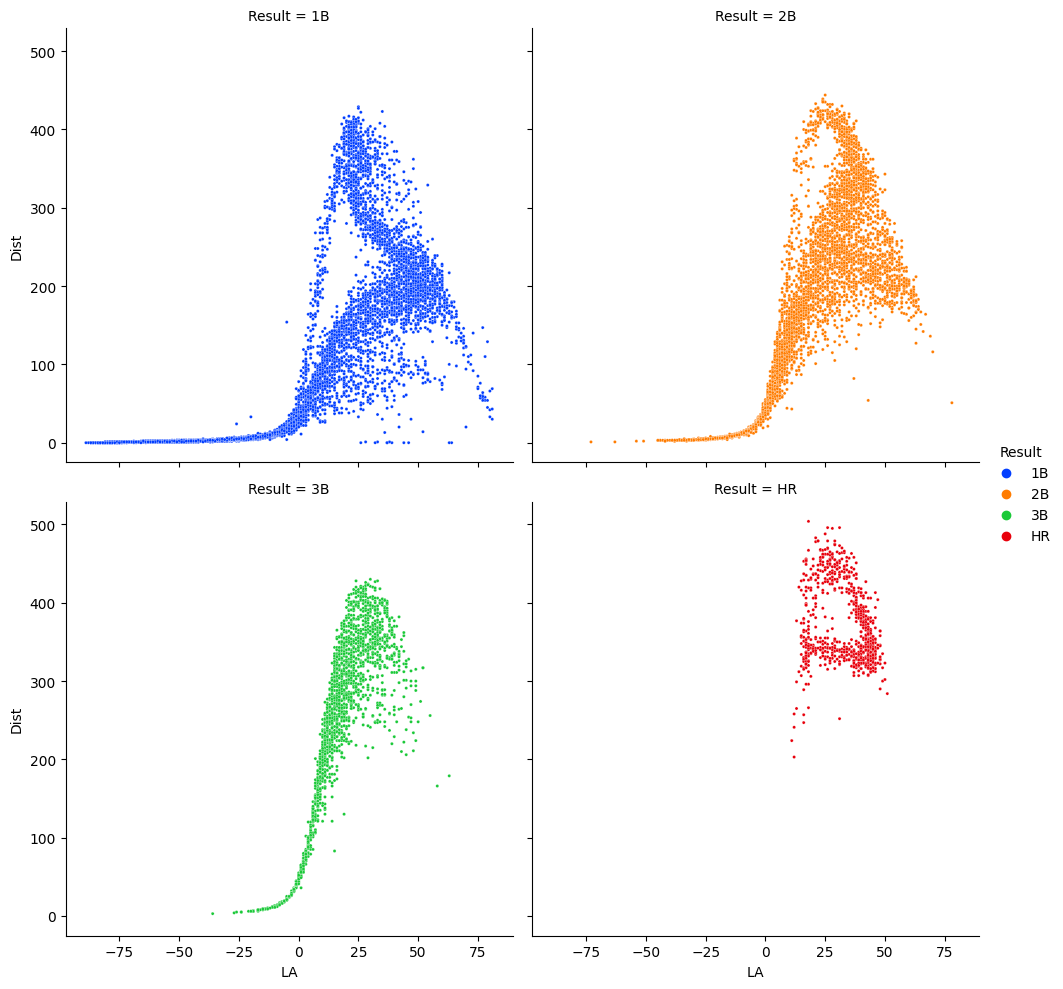

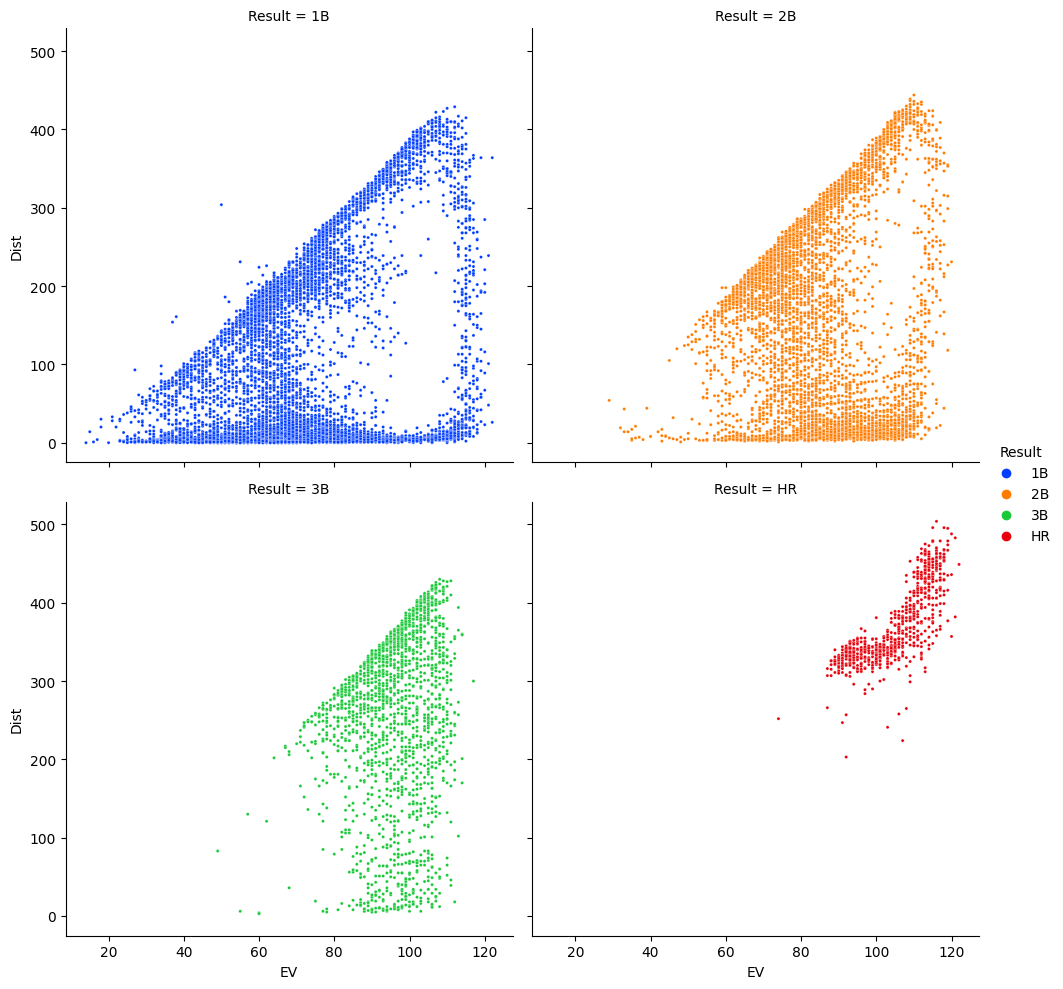

In [5]:

hit_order = ['1B', '2B', '3B', 'HR']

hitplotLA = sns.relplot(data=data_hit, x='LA', y='Dist', s=5, marker='o', palette='bright', hue='Result', hue_order=hit_order, 
                   col='Result', col_wrap=2, col_order=hit_order)
hitplotEV = sns.relplot(data=data_hit, x='EV', y='Dist', s=5, marker='o', palette='bright', hue='Result', hue_order=hit_order, 
                        col='Result', col_wrap=2, col_order=hit_order)

/var/folders/w8/vvmn7s9x2yzffnkyk6j2j_xc0000gn/T/ipykernel_10415/44371550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hit['Result'] = pd.Categorical(data_hit['Result'], ['1B', '2B', '3B', 'HR'])


<Axes: xlabel='Result', ylabel='Count'>

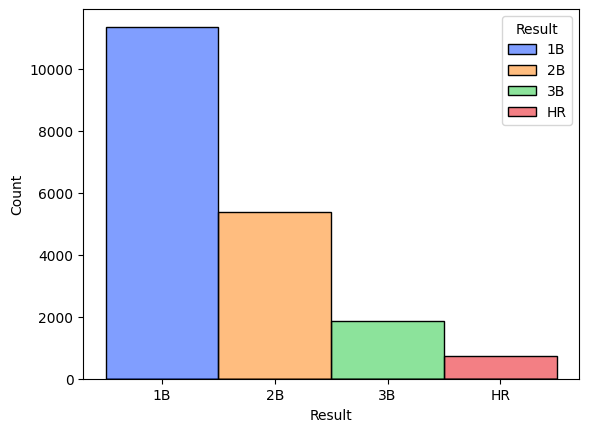

In [6]:
#count = data_hit.count()
data_hit['Result'] = pd.Categorical(data_hit['Result'], ['1B', '2B', '3B', 'HR'])
sns.histplot(data=data_hit, x='Result', stat='count', hue='Result', hue_order=hit_order, palette='bright')
#sns.displot(data22, x='EV', kind='kde')

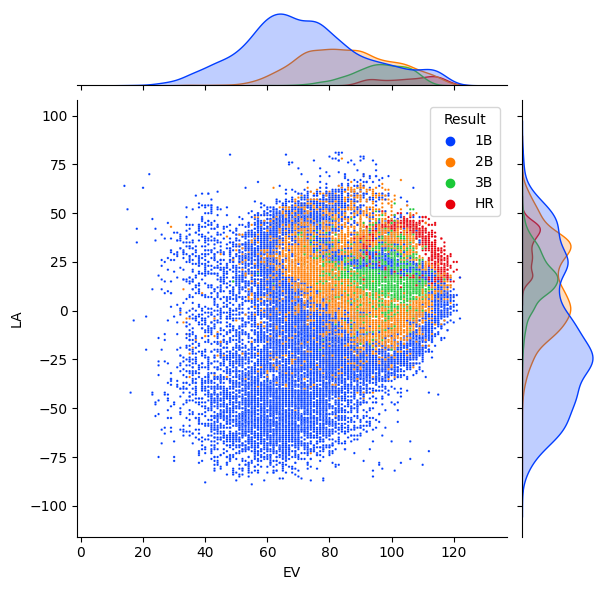

In [7]:
# In my opinion, this plot does the best job of visualizing results for a given LA and EV

# The following two plots will be utilized a lot in future work in which I plan to allow a user to enter
# a desired LA & EV and the program to calculate the probability of achieving a certain result based on data collected
# 
# of course, this does not take any other factors into consideration and it would be ignorant to assume those are the only two contributors 
# to the flight path and result of a given BBE.

sns.jointplot(data=data_hit, x='EV', y='LA', hue='Result', s=3, marker='o', palette='bright', hue_order=hit_order)


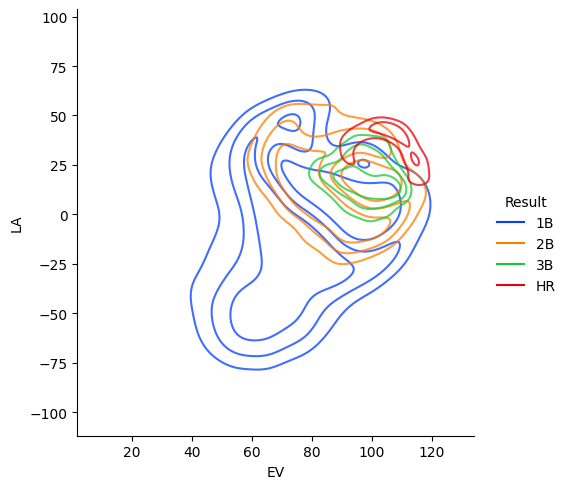

In [8]:

sns.displot(data_hit, x='EV', y='LA', hue='Result', kind='kde', palette='bright', hue_order=hit_order, levels=[0, 0.25, 0.5, 0.75], alpha=0.75)